# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [21]:
# Installing the libraries with the specified version.
!pip install numpy==2.0.2 pandas==2.2.2 matplotlib==3.10.0 seaborn==0.13.2 -q --user

**Note**:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in ***this notebook***.

In [22]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [23]:
# Write your code here to read the data
order_data = pd.read_csv('foodhub_order.csv')

In [24]:
# Write your code here to view the first 5 rows
order_data.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [25]:
# Write your code here
rows, cols = order_data.shape
print(f"there are {rows} rows")
print(f"there are {cols} columns")

there are 1898 rows
there are 9 columns


#### Observations:


there are 1898 rows
there are 9 columns

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [26]:
# Write your code here
order_data.info()
# order_id is an int
# customer_id is in int
# restaurant_name is default obj
# cuisine_type is default obj
# cost_of_the_order is a float
# day_of_the_week is a default obj
# rating is a default obj
# food_preperation_time is a int
# delivery_time is a int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


order_id is an int
customer_id is in int
restaurant_name is default obj
cuisine_type is default obj
cost_of_the_order is a float
day_of_the_week is a default obj
rating is a default obj
food_preperation_time is a int
delivery_time is a int


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [27]:
# Write your code here
null_orders = order_data.isnull().sum()
na_orders = order_data.isna().sum()
print(null_orders)
print(na_orders)

# #appears there are no missing values here, unless we count rating "Not Given"?
order_data['rating'] = order_data['rating'].replace(['Not given'], np.nan)
order_data['rating'] = pd.to_numeric(order_data['rating'])
order_data['rating'] = order_data['rating'].astype('float')

# # Replace nulls with avg restaurant rating
# order_data['rating'] = order_data['rating'].fillna(value=order_data.groupby(['restaurant_name'])['rating'].transform('mean'))

# # Replace restaurants with no avg rating with avg cuisine rating
# order_data['rating'] = order_data['rating'].fillna(value=order_data.groupby(['cuisine_type', 'day_of_the_week'])['rating'].transform('mean'))

# # Round down using floor and convert to int
# order_data['rating'] = np.floor(order_data['rating']).astype('int')
# order_data


order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64
order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


#### Observations:


appears there are no missing values here, unless we count rating "Not Given"? If we wanted to replace the not given I used the restaurants average rating. For restaurants without a rating I used cuisine type and day of the week.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [28]:
# Write your code here
descriptive_order_stats = order_data.describe()
food_prep_stats = descriptive_order_stats.loc[['min', 'mean', 'max'], 'food_preparation_time']
print(f"The minium time it takes for food to be prepared is {food_prep_stats.loc['min']}")
print(f"The average time it takes for food to be prepared is {food_prep_stats.loc['mean']}")
print(f"The maximum time it takes for food to be prepared is {food_prep_stats.loc['max']}")

The minium time it takes for food to be prepared is 20.0
The average time it takes for food to be prepared is 27.371970495258168
The maximum time it takes for food to be prepared is 35.0


#### Observations:


The minium time it takes for food to be prepared is 20.0
The average time it takes for food to be prepared is 27.371970495258168
The maximum time it takes for food to be prepared is 35.0

### **Question 5:** How many orders are not rated? [1 mark]

In [29]:
# Write the code here
rating_val_counts = order_data['rating'].value_counts()
print(f"number of orders not rated is {rating_val_counts.iloc[0]}")

number of orders not rated is 588


#### Observations:


number of orders not rated is 588

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

**Cost of order** **analysis**

<Axes: xlabel='cost_of_the_order', ylabel='Count'>

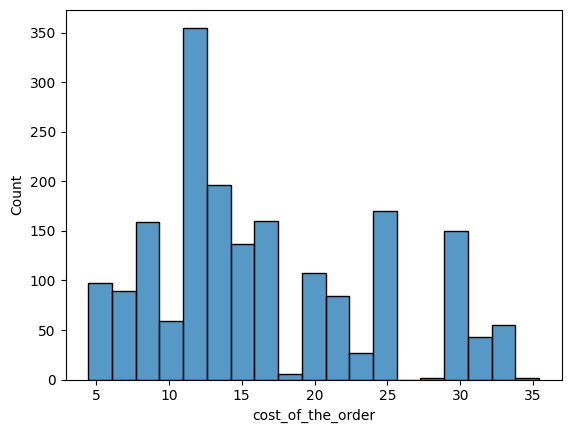

In [30]:
# Write the code here
sns.histplot(data=order_data,x='cost_of_the_order')
#Most orders are between 10 and 15 dollars.

<Axes: xlabel='cost_of_the_order'>

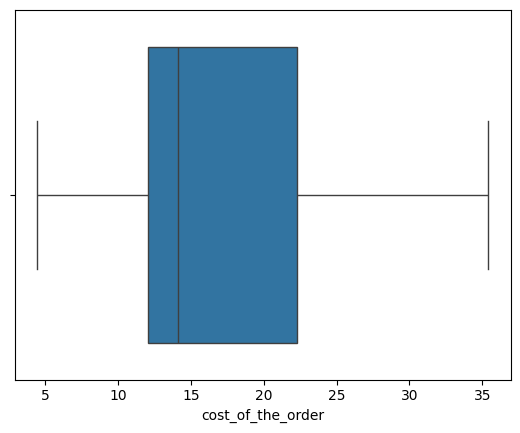

In [31]:
sns.boxplot(data=order_data,x='cost_of_the_order')
# 50% of orders are between roughly 12 to 23 dollars

**Rating analysis**

<Axes: xlabel='rating', ylabel='count'>

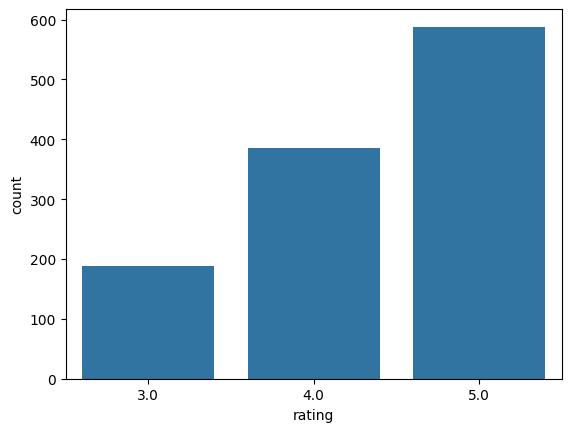

In [32]:
sns.countplot(data=order_data,x='rating')
# Most orders did not recieve a rating

<Axes: xlabel='rating', ylabel='Count'>

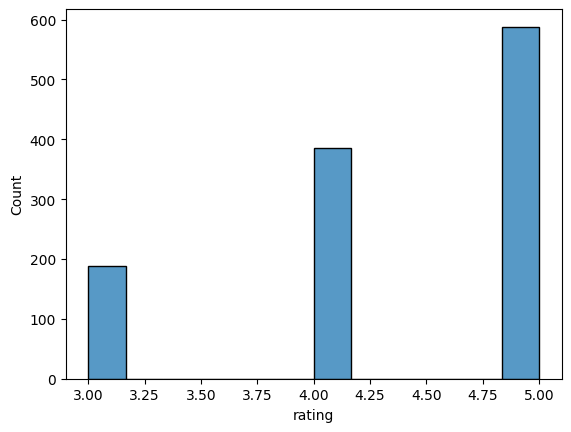

In [33]:
# Write the code here
filtered_ratings = order_data[order_data['rating'] != 'Not given']
sns.histplot(data=filtered_ratings, x='rating')
# Mostly see 5 or 4 ratings

**Food Prep Time Analysis**

<Axes: xlabel='food_preparation_time'>

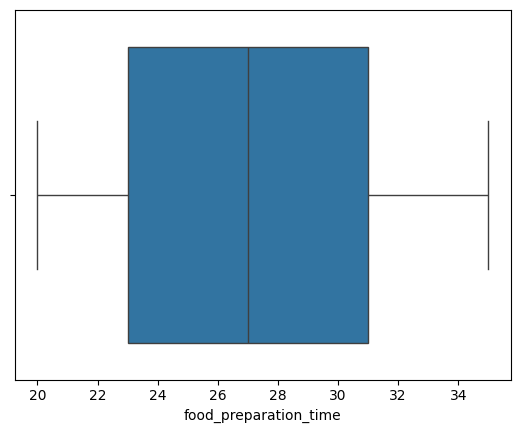

In [34]:
sns.boxplot(data=order_data,x='food_preparation_time')
# 50% of orders took between 23 and 31 minutes to arrive.

In [35]:
print(f"average prep time was {int(order_data['food_preparation_time'].mean())} minutes")
print(f"The min prep time was {order_data['food_preparation_time'].min()} minutes")
print(f"The max prep time was {order_data['food_preparation_time'].max()} minutes")

average prep time was 27 minutes
The min prep time was 20 minutes
The max prep time was 35 minutes


**Delivery Time analysis**

<Axes: xlabel='delivery_time', ylabel='Count'>

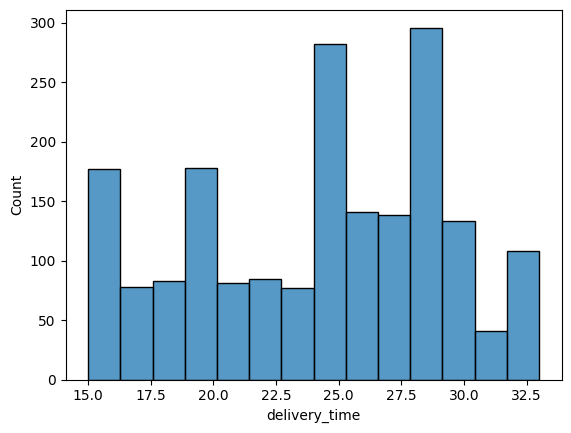

In [36]:
sns.histplot(data=order_data,x='delivery_time')

In [37]:
print(f"The average delivery time was {int(order_data['delivery_time'].mean())} minutes")
print(f"The min delivery time was {order_data['delivery_time'].min()} minutes")
print(f"The max delivery time was {order_data['delivery_time'].max()} minutes")

The average delivery time was 24 minutes
The min delivery time was 15 minutes
The max delivery time was 33 minutes


**Day of the week analysis**

<Axes: xlabel='day_of_the_week', ylabel='count'>

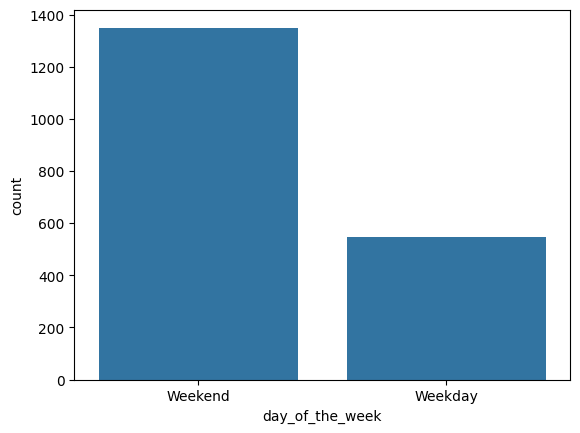

In [38]:
sns.countplot(data=order_data,x='day_of_the_week')
# Most orders are placed on weekend

**Cuisine Analysis**

<Axes: xlabel='count', ylabel='cuisine_type'>

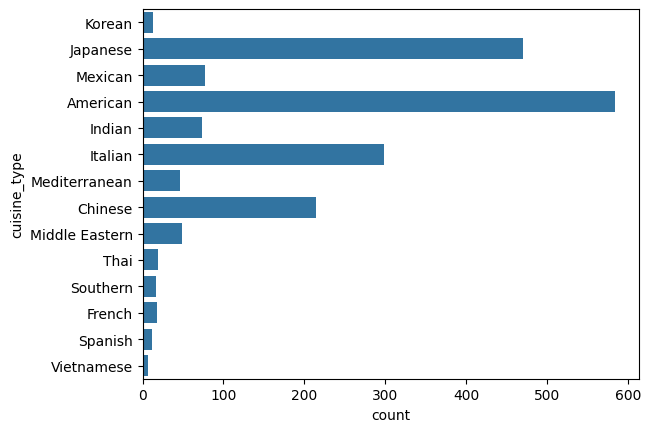

In [39]:
sns.countplot(data=order_data,y='cuisine_type')
#Most orders are for american cuisine

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [40]:
top_5_restaurants = order_data['restaurant_name'].value_counts()
top_5_restaurants = top_5_restaurants.sort_values(ascending=False).head(5)
for i,rest in enumerate(top_5_restaurants.items()):
  print(f"{i+1} ranked is {rest[0]} with {rest[1]} orders")


1 ranked is Shake Shack with 219 orders
2 ranked is The Meatball Shop with 132 orders
3 ranked is Blue Ribbon Sushi with 119 orders
4 ranked is Blue Ribbon Fried Chicken with 96 orders
5 ranked is Parm with 68 orders


#### Observations:


1 ranked is Shake Shack with 219 orders.
2 ranked is The Meatball Shop with 132 orders.
3 ranked is Blue Ribbon Sushi with 119 orders.
4 ranked is Blue Ribbon Fried Chicken with 96 orders.
5 ranked is Parm with 68 orders.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [41]:
# Write the code here
weekend_orders = order_data[order_data['day_of_the_week']=='Weekend']
top_weekend_cuisines = weekend_orders['cuisine_type'].value_counts().sort_values(ascending=False).head(1)
print("the top weekend cuisine is")
top_weekend_cuisines


the top weekend cuisine is


,count
cuisine_type,
American,415


#### Observations:


the top weekend cuisine is American

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

total orders 1898
orders over 20$ 555
Percentage of orders over 20$ 29.24%


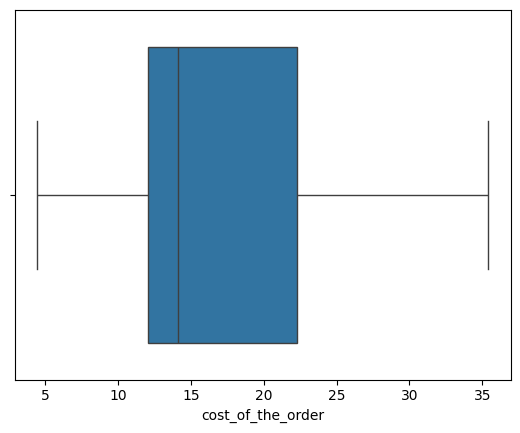

In [42]:
# Write the code here
sns.boxplot(data=order_data,x="cost_of_the_order")
total_orders = order_data.shape[0]
orders_over_twenty = order_data[order_data["cost_of_the_order"]>20].shape[0]
per_over_twenty = (orders_over_twenty/total_orders)*100
print(f"total orders {total_orders}")
print(f"orders over 20$ {orders_over_twenty}")
print(f"Percentage of orders over 20$ {round(per_over_twenty,2)}%")

#### Observations:


total orders is 1898.
orders over 20 dollars is 555.
Percentage of orders over 20 dollars is 29.24%.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [43]:
# Write the code here
mean_delivery_time = order_data["delivery_time"].mean()
print(f"mean order delivery time is {round(mean_delivery_time,2)} minutes")


mean order delivery time is 24.16 minutes


#### Observations:


mean order delivery time is 24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [44]:
# Write the code here
top_3 = order_data['customer_id'].value_counts().sort_values(ascending=False).head(3)
for customer_id, num_orders in top_3.items():
    print(f"customer id: {customer_id} made {num_orders} orders")

customer id: 52832 made 13 orders
customer id: 47440 made 10 orders
customer id: 83287 made 9 orders


#### Observations:


customer id: 52832 made 13 orders.
customer id: 47440 made 10 orders.
customer id: 83287 made 9 orders.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


General Correlation of Values

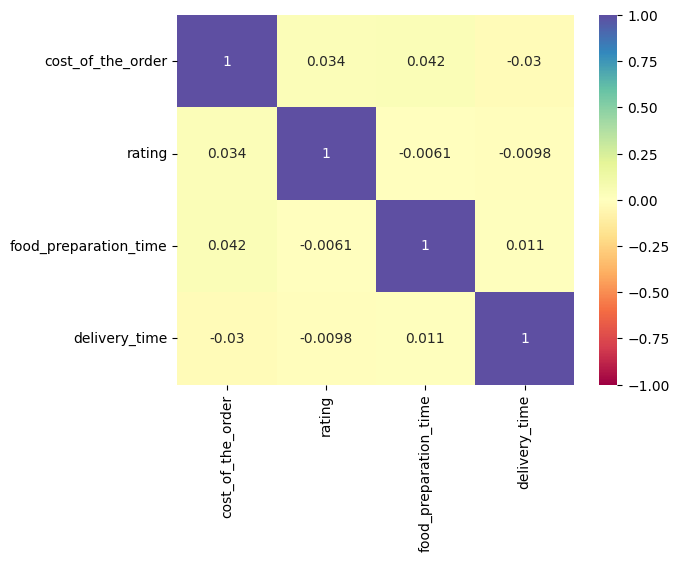

In [45]:
num_cols = order_data[['cost_of_the_order','rating', 'food_preparation_time', 'delivery_time']]
sns.heatmap(num_cols.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

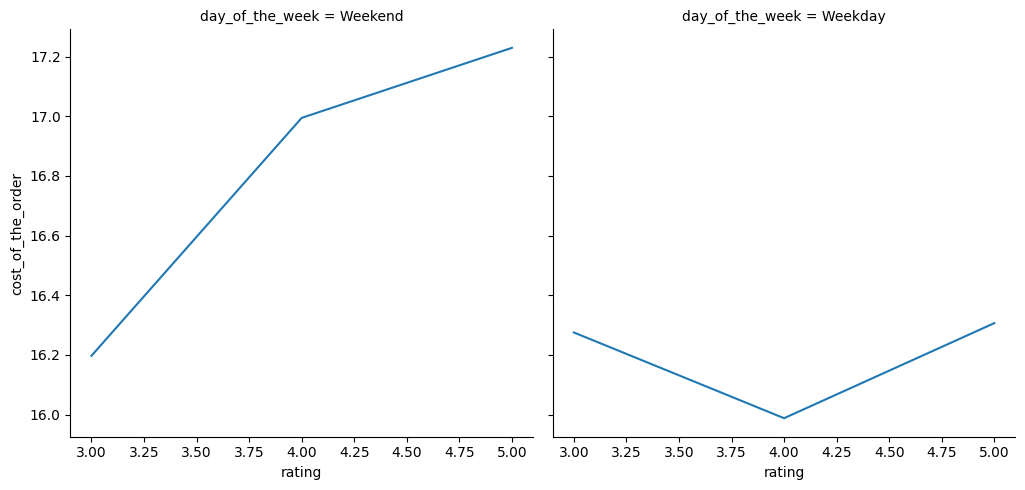

In [46]:
sns.relplot(data=order_data,x='rating',y='cost_of_the_order',col='day_of_the_week',kind='line', errorbar=None, col_wrap=4)

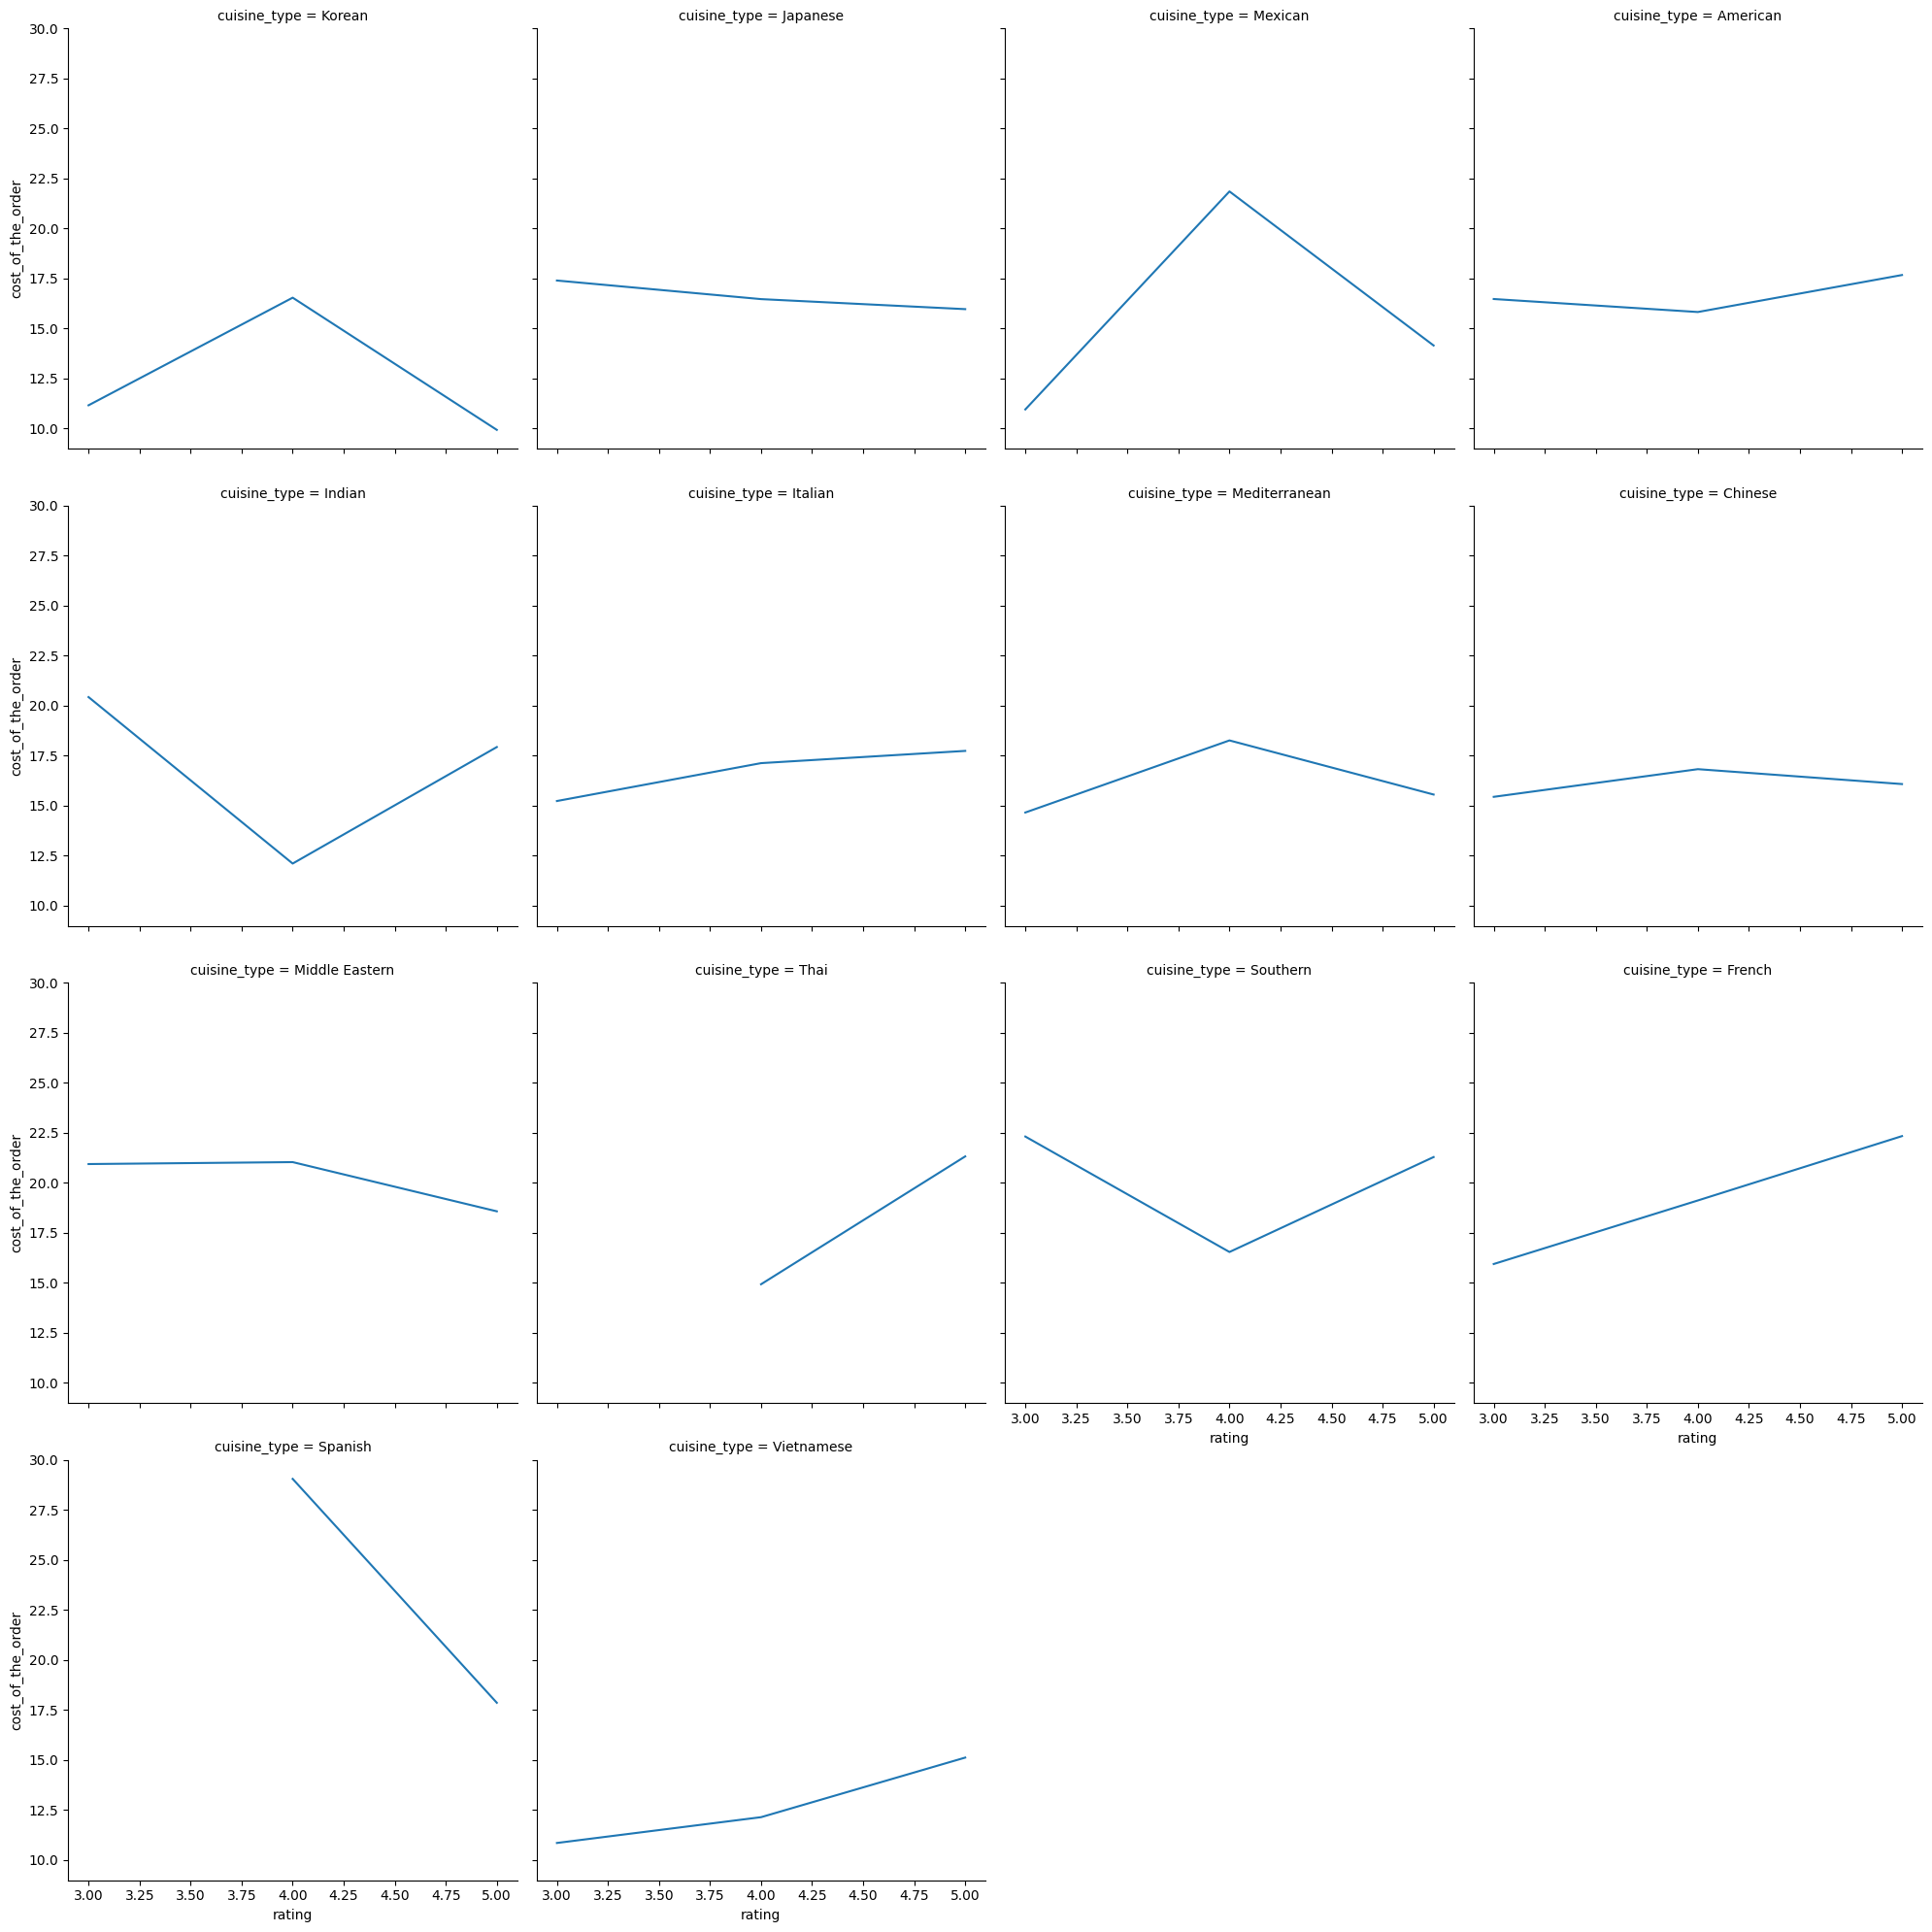

In [47]:
sns.relplot(data=order_data,x='rating',y='cost_of_the_order',col='cuisine_type',kind='line', errorbar=None, col_wrap=4)

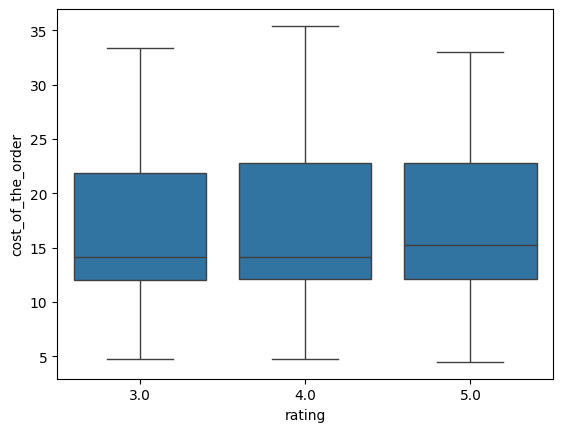

<Axes: xlabel='rating', ylabel='cost_of_the_order'>

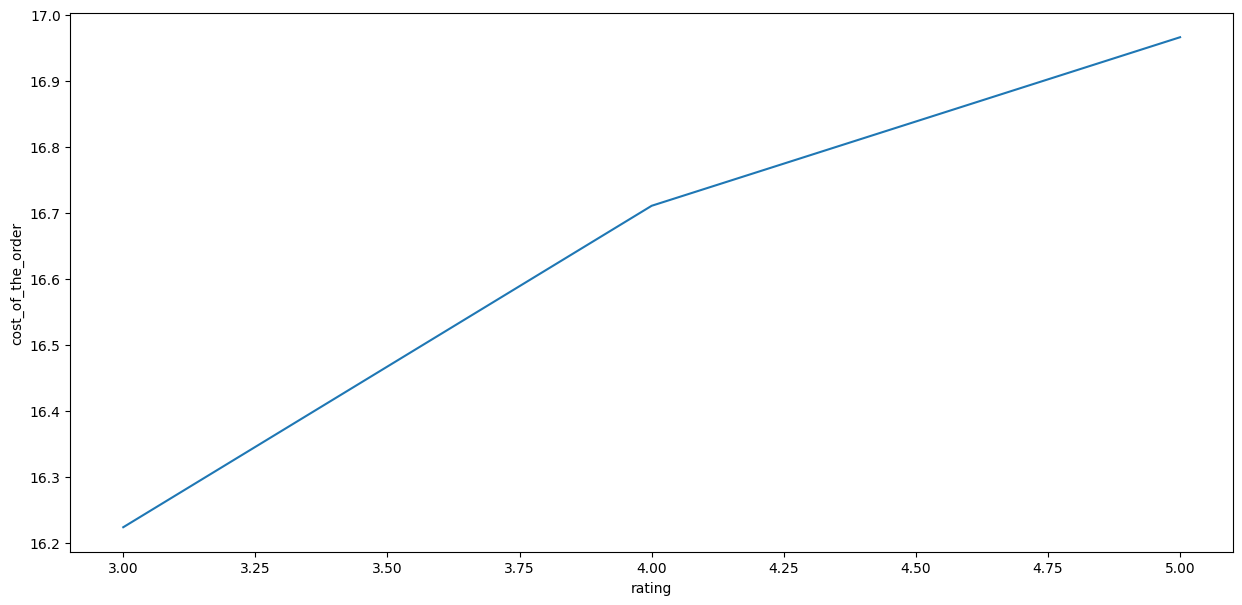

In [48]:
sns.boxplot(data=order_data,x='rating',y='cost_of_the_order',showfliers=False)
plt.show()
plt.figure(figsize=(15,7))
sns.lineplot(data=order_data,x='rating',y='cost_of_the_order',errorbar=None)
# Postive correlation of cost and rating

<Axes: xlabel='food_preparation_time', ylabel='cost_of_the_order'>

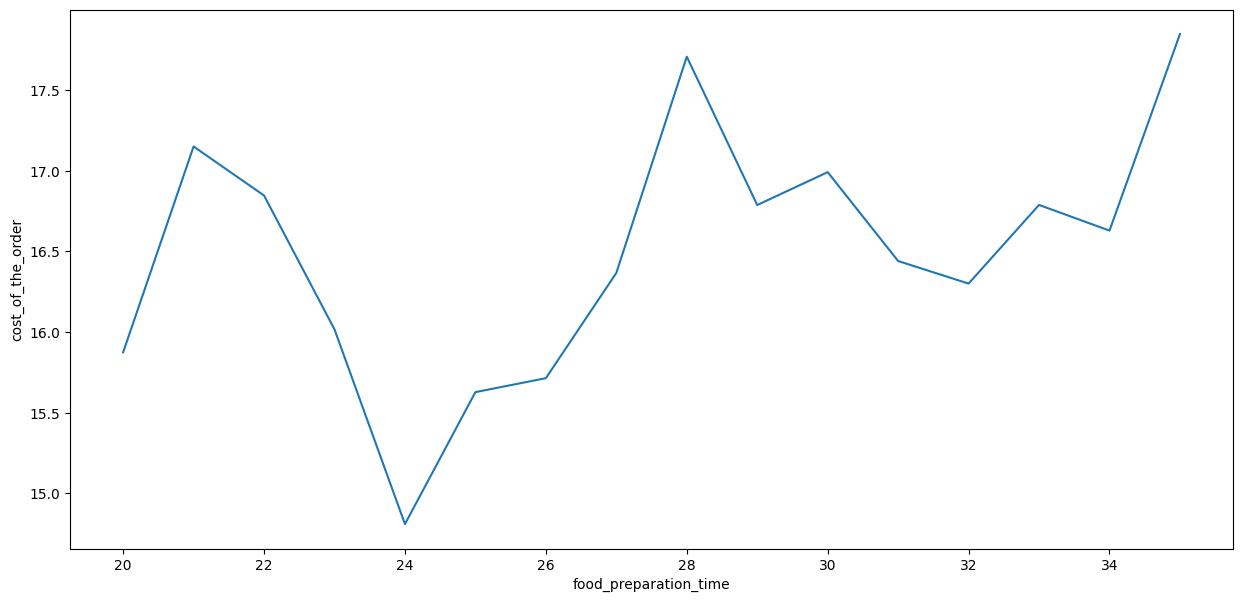

In [49]:
plt.figure(figsize=(15,7))
sns.lineplot(data=order_data,x='food_preparation_time',y='cost_of_the_order',errorbar=None)
#The higher cost of the order the more prep time

<Axes: xlabel='delivery_time', ylabel='cost_of_the_order'>

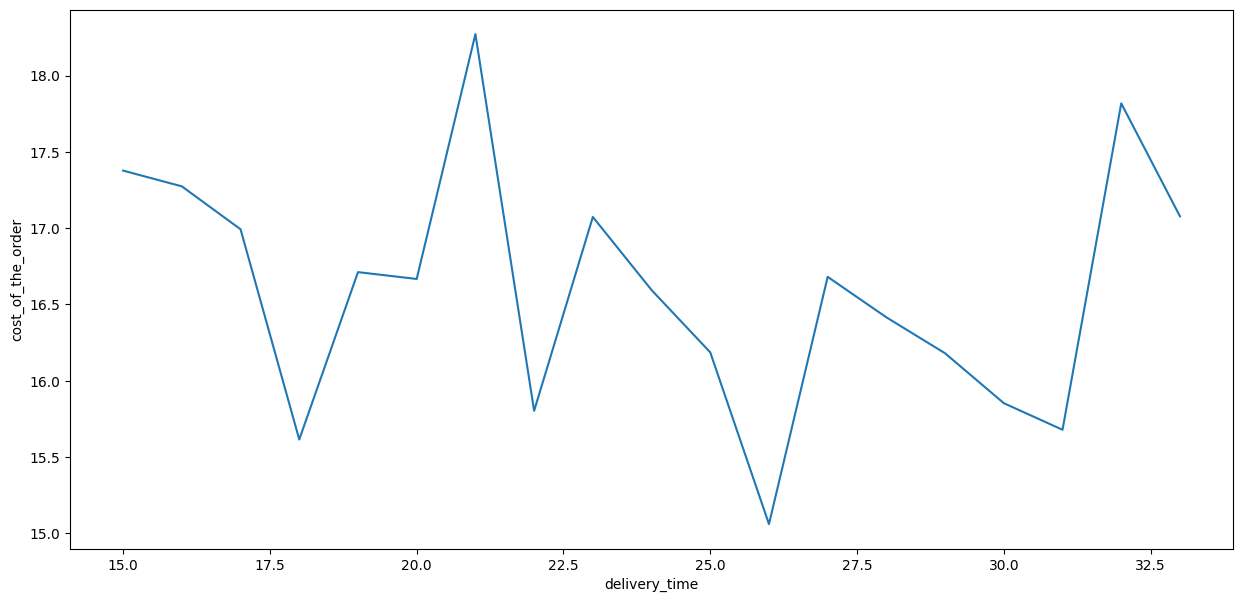

In [50]:
plt.figure(figsize=(15,7))
sns.lineplot(data=order_data,x='delivery_time',y='cost_of_the_order',errorbar=None)
# No real relationship

<Axes: xlabel='cost_of_the_order', ylabel='cuisine_type'>

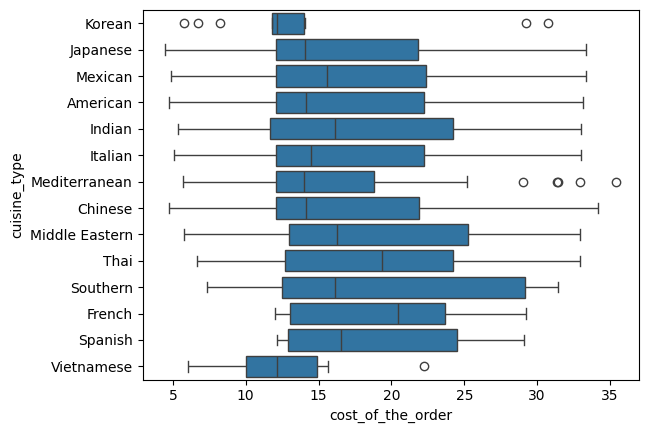

In [51]:
sns.boxplot(data=order_data,x='cost_of_the_order',y='cuisine_type')

<Axes: xlabel='rating', ylabel='food_preparation_time'>

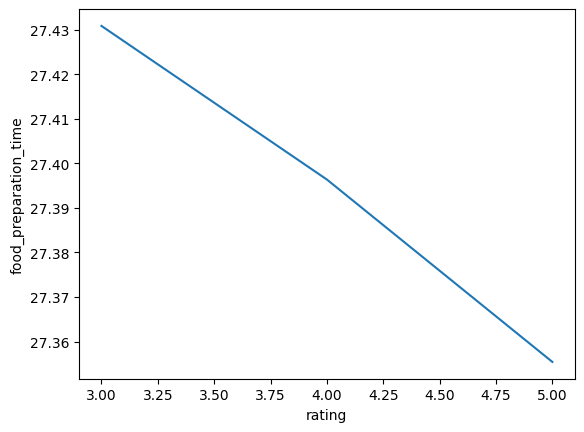

In [52]:
sns.lineplot(data=order_data,y='food_preparation_time',x='rating',errorbar=None)
# The longer the food prep time the lower the rating

<Axes: xlabel='delivery_time', ylabel='food_preparation_time'>

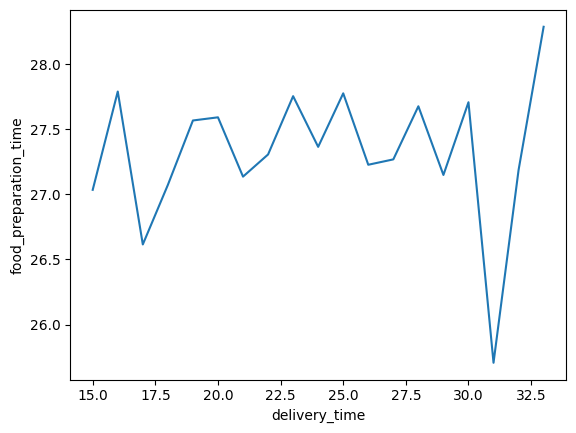

In [53]:
sns.lineplot(data=order_data,y='food_preparation_time',x='delivery_time',errorbar=None)

<Axes: xlabel='food_preparation_time', ylabel='day_of_the_week'>

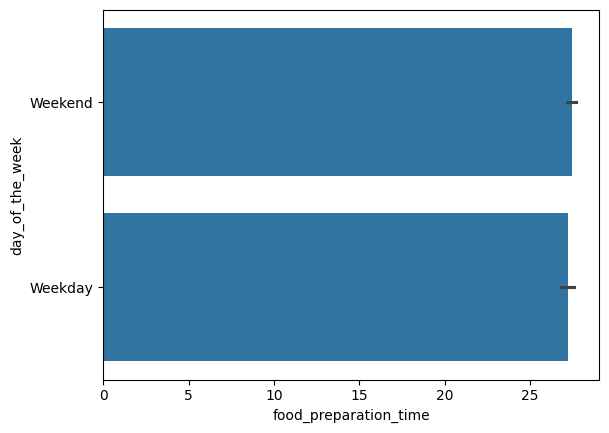

In [54]:
sns.barplot(data=order_data,x='food_preparation_time',y='day_of_the_week')
# longer food prep time the higher cost of order

<Axes: xlabel='rating', ylabel='cost_of_the_order'>

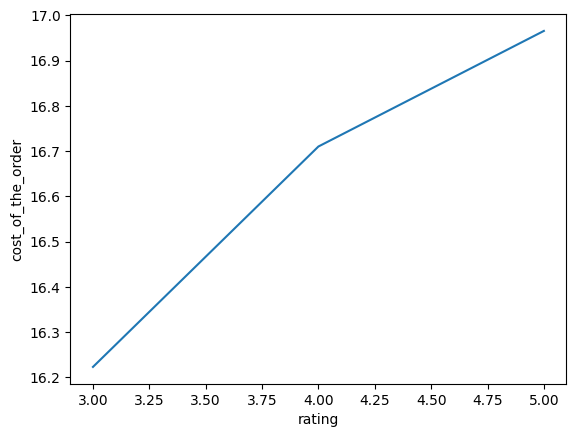

In [55]:
sns.lineplot(data=order_data,x='rating',y='cost_of_the_order',errorbar=None)
# Higher cost of the order has a higher rating

<Axes: xlabel='rating', ylabel='food_preparation_time'>

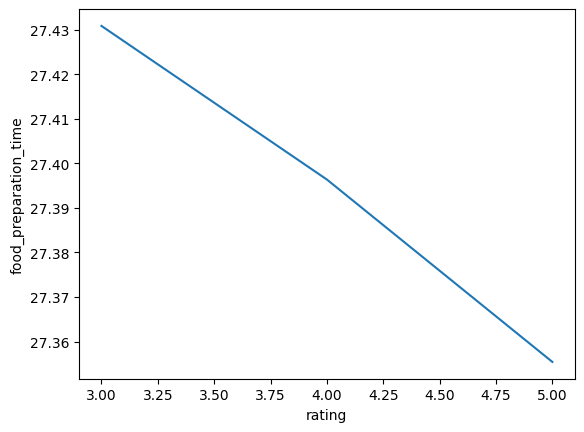

In [56]:
sns.lineplot(data=order_data,x='rating',y='food_preparation_time',errorbar=None)
# Higher rating for lower food prep time

<Axes: xlabel='rating', ylabel='delivery_time'>

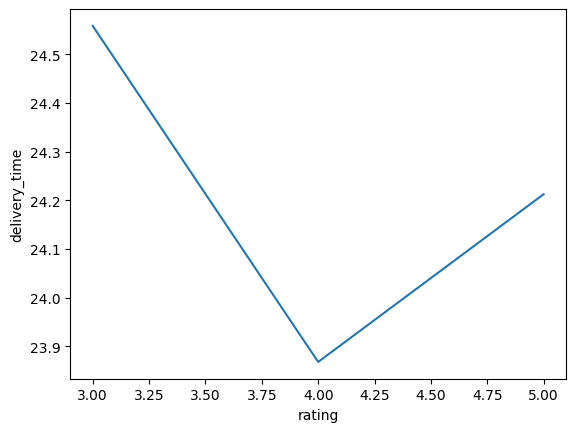

In [73]:
sns.lineplot(data=order_data,x='rating',y='delivery_time',errorbar=None)

<Axes: xlabel='rating', ylabel='cuisine_type'>

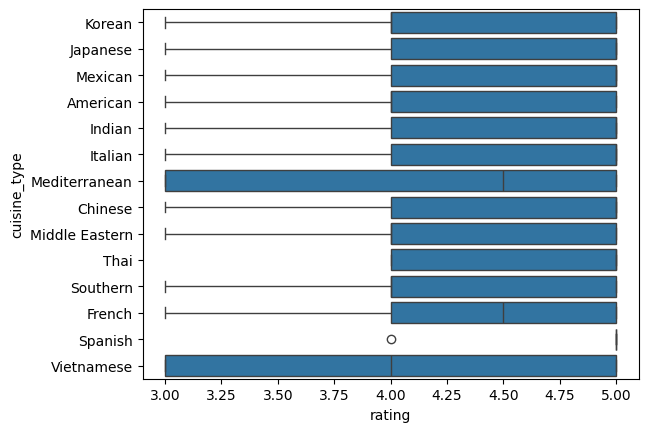

In [57]:
sns.boxplot(data=order_data,x='rating',y='cuisine_type')

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [58]:
result = order_data.groupby('restaurant_name')['rating'].agg(['count', 'mean'])
result = result[(result['count'] > 50) & (result['mean'] > 4)]
result

,count,mean
restaurant_name,,
Blue Ribbon Fried Chicken,64,4.328125
Blue Ribbon Sushi,73,4.219178
Shake Shack,133,4.278195
The Meatball Shop,84,4.511905


#### Observations:


Blue Ribbon Fried Chicken.
Blue Ribbon Sushi.
Shake Shack.
The Meatball Shop. All have 50 orders with an avg rating above 4.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [66]:
twenty_dollar_orders = order_data[order_data["cost_of_the_order"]>20]
first_sum = (twenty_dollar_orders["cost_of_the_order"].sum()*.25)
five_dollar_orders = order_data[(order_data["cost_of_the_order"]>5) & (order_data["cost_of_the_order"]<20)]
second_sum = (five_dollar_orders["cost_of_the_order"].sum()*.15)
total_revenue = round(first_sum+second_sum,2)
print(total_revenue)

6166.3


#### Observations:


6166.30 dollars in total revenue.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [60]:
order_data['total_delivery_time'] = order_data['food_preparation_time'] + order_data['delivery_time']
hour_orders = order_data[order_data['total_delivery_time']>60].shape[0]
total_orders = order_data.shape[0]
perc = (hour_orders/total_orders)*100
print(f"The total percentage of orders over 60 minutes is {round(perc,2)}%")

The total percentage of orders over 60 minutes is 10.54%


#### Observations:


The total percentage of orders over 60 minutes is 10.54%

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [61]:
avg_delivery_time = order_data.groupby('day_of_the_week')['delivery_time'].mean()
weekday_avg = avg_delivery_time.loc['Weekday']
weekend_avg = avg_delivery_time.loc['Weekend']
print(f"deliveries are {round((weekday_avg-weekend_avg),2)} minutes faster on weekdays than weekends")

deliveries are 5.87 minutes faster on weekdays than weekends


#### Observations:


deliveries are 5.87 minutes faster on weekdays than weekends

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

In [79]:
order_data.groupby('cuisine_type')['rating'].mean().sort_values(ascending=False)
order_data.groupby('cuisine_type')['cost_of_the_order'].sum().sort_values(ascending=False)
order_data.groupby('cuisine_type')['food_preparation_time'].sum().sort_values(ascending=False)

,rating
cuisine_type,
Spanish,4.833333
Thai,4.666667
Indian,4.540000
Mexican,4.416667
Japanese,4.373626
Italian,4.360465
Chinese,4.338346
Southern,4.307692
French,4.300000


### Conclusions:
*  The best business will happen on the weekends. There is more higher cost orders and better overall ratings on the weekends. The restaurants with faster food prep time yield better ratings. Spanish, Thai, and Indian cuisine type restaurants yeild the best ratings. The higher costing orders have a longer prep time. Longer prep time negatively impacts ratings but also higher costing orders have higher ratings. American, Japanense, and Italian cuisines generate the most revenue for the business, Although these also have the longest prep time which can impact user ratings. Orders are fulfilled faster on weekdays and not weekends.

### Recommendations:

*  I would promote users to eat at the restaurants with a cuisine type that generates the most revenue like American, Japanense, and Italian. I would try to work with those restaurants to prioritize preparing those orders faster to try and cut down on food prep time in order to get better user ratings. I would offer discounts to the customer_ids with over 10 orders to keep them using the app. For users who ussually give lower ratings I would suggest them to try Spanish, Thai, and Indian cuisine restaurants as those yeild the best ratings. I would make sure there are more drivers working on the weekends to meet customer demand and to try and cut down on the total_delivery_time.

---